In [62]:
from collections import *
from heapq import *
from functools import *
from math import *
import numpy as np

data = None

with open('input.txt', 'r') as file:
    data = file.readlines()
    data = [d.strip() for d in data]
   # print(data)

In [63]:
robots_ = []
for d in data:
    sp = d.split()
    startx,starty = sp[0].split(',')
    startx = int(startx[2:])
    starty = int(starty)
    velocityx,velocityy = sp[1].split(',')
    velocityx = int(velocityx[2:])
    velocityy = int(velocityy)
    robots_.append([startx,starty,velocityx,velocityy])
    
m,n = 103,101

def printImage(robots):
    board = [[' ' for i in range(n)] for j in range(m)]
    for x,y,_,_ in robots:
        board[y][x] = '#'
    board = [''.join(s) for s in board]

    found = False
    for s in board:
        if "########" in s:
            found=True
            break
    if not found:
        return
    for row in board:
        print(''.join(row))
    print('')
    
def getMove(x,y,vx,vy):
    return (x+vx)%n,(y+vy)%m

In [64]:
import copy
robots = copy.deepcopy(robots_)

for sec in range(100):
    newbots = []
    for px,py,vx,vy in robots:
        px,py = getMove(px,py,vx,vy)
        newbots.append([px,py,vx,vy])
    robots=newbots
#  1|2
# --- 
#  3|4
q1,q2,q3,q4 = 0,0,0,0
for x,y,_,__ in robots:
    if x > n//2:
        if y < m//2:
            q2 += 1
        if y > m//2:
            q4 += 1
    if x < n//2:
        if y < m//2:
            q1+= 1
        if y > m//2:
            q3 += 1
prod = q1*q2*q3*q4
            
print(prod)
    

216027840


In [65]:
import copy
robots = copy.deepcopy(robots_)
with open('out.txt', 'w') as f:
    with redirect_stdout(f):
        for sec in range(1,10000):
            newbots = []
            for px,py,vx,vy in robots:
                px,py = getMove(px,py,vx,vy)
                newbots.append([px,py,vx,vy])
            robots=newbots
            print("------------------------",sec)
            printImage(robots)


In [66]:
import numpy as np
import skimage
from skimage import io, color
from skimage.filters.rank import entropy
from skimage.morphology import disk
import matplotlib.pyplot as plt

def getImage(robots):
    board = [[0 for i in range(n)] for j in range(m)]
    for x, y, _, _ in robots:
        board[y][x] = 255
    img = np.array(board, dtype=np.uint8)
    return img

def getEntropy(img):
    selem = disk(3)
    entropy_image = entropy(img, selem)
    mean_entropy = np.mean(entropy_image)
    return mean_entropy

In [72]:
import time
start = time.time()
robots = copy.deepcopy(robots_)
images = []
for sec in range(1,10000):
    newbots = []
    for px,py,vx,vy in robots:
        px,py = getMove(px,py,vx,vy)
        newbots.append([px,py,vx,vy])
    robots=newbots
    img = getImage(robots)
    e = getEntropy(img)
    images.append((e,sec,img))
images.sort(key=lambda x:x[0])
end = time.time()
print(end-start)
print(images[0][:2])

47.49012732505798
(0.15206397379748104, 6876)


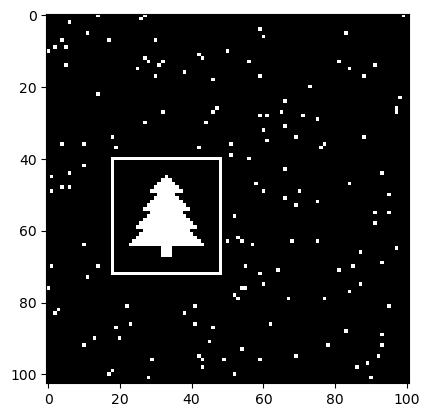

In [68]:
plt.imshow(images[0][2], cmap='gray')            
plt.show()